<a href="https://colab.research.google.com/github/Georgemoralex/Data-Science-and-AI/blob/main/Solucion_Reto_M8_Jorge_Morales_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÓDULO 7 - APRENDIZAJE SUPERVISADO

---------
## Reto | Deserción laboral <p> Elaborado por Jorge Morales


1. Realizar un análisis descriptivo que incluya la cantidad y tipo de variables que se tienen en el conjunto de datos original.

Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada "data".

Obtener la información de dicha base de datos que incluya:
- Número de registros.
- Total de variables.
- Tipo de cada variable.
- Cantidad de datos perdidos de cada variable.



In [11]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Employee_Attrition_datos_reto_binario.csv')

print(data.head())
print("Información general de la base de datos:")
print(data.info())
print("Descripción estadística de la base de datos")
print(data.describe().T)

print("Valores nulos por atributo:")
print(data.isnull().sum().T)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

Podemos observar 1470 registros y 35 variables en nuestro dataframe, no faltan valores en la base de datos, tenemos los datos estadísticos y el tipo de dato de cada atributo.



2. Incluir información sobre las variables que tienen datos y la decisión que tomarás sobre qué hacer con ellas.

Borra las variables que consideres no deben estar en el modelo. Justifica cada decisión de las variables eliminadas.

Transforma las variables categóricas de manera que puedan ser tratadas numéricamente.

Considera la variable Attrition como la variable de salida y el resto de las variables como las variables de entrada.

----------

**a) Se eliminarán las siguientes variables pues no representan ni aportan ningún valor para el estudio - EmployeeNumber & EmployeeCount**

**b) También se identificarán las variables categóricas y se convertirán a numéricas a través del método Label Encoding sin tener que aumentar el número de columnas para el estudio**

**c) Se definirá a la variable attrition como variable de salida "Y" y se normalizarán los datos para ser utilizados en el modelo**

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", categorical_cols)

columns_to_drop = ['EmployeeNumber', 'EmployeeCount']
print(f"Eliminando columnas: {columns_to_drop}")
data = data.drop(columns=columns_to_drop)

label_encoders = {}
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

X = data.drop(columns=['Attrition'])
y = data['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Información del nuevo dataset estandarizado y con todas las variables numéricas")
print(data.info())


Variables categóricas: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Eliminando columnas: ['EmployeeNumber', 'EmployeeCount']
Información del nuevo dataset estandarizado y con todas las variables numéricas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender               


3. Realizar la partición de tus datos en los conjuntos de entrenamiento, validación y prueba correspondientes.

Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.




In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

4. Construir, configurar y evaluar 4 modelos supervisados vistos en el curso.

Para cada uno de los 4 métodos clásicos de aprendizaje supervisado vistos en la sesión 1:
(1) Bosques Aleatorios, (2) Regresión Logística, (3) Bayes Ingenuo Gaussiano y (4) Máquina de Vectores de Soporte, realiza lo siguiente:

Crea el modelo de aprendizaje con los hiperparámetros por omisión.

Entrena el modelo utilizando el conjunto de entrenamiento.



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Modelo Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Modelo Regresión Logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Modelo SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Seleccionar el mejor modelo basado en la mayor precisión
accuracies = {
    "Random Forest": accuracy_rf,
    "Regresión Logística": accuracy_lr,
    "Naive Bayes": accuracy_nb,
    "SVM": accuracy_svm
}

print(accuracies)
best_model_name = max(accuracies, key=accuracies.get)
print(f"El mejor modelo es: {best_model_name} con una precisión de {accuracies[best_model_name]:.4f}")


{'Random Forest': 0.8639455782312925, 'Regresión Logística': 0.8673469387755102, 'Naive Bayes': 0.7857142857142857, 'SVM': 0.8741496598639455}
El mejor modelo es: SVM con una precisión de 0.8741


5. Determinar cuál consideras es el mejor modelo, justificando tu respuesta con base en los resultados previos obtenidos.

Evalúa el modelo con las predicciones del conjunto de prueba, su matriz de confusión y las métricas de desempeño (accuracy, precision, recall, f1-score).

Configura el mejor modelo seleccionando los valores para 2 o más de sus hiperparámetros. Utiliza GridSearchCV o RandomizedSearchCV.

Determina si el mejor modelo configurado es mejor que el modelo aprendido con hiperparámetros por omisión.

--------
**A) El mejor modelo es SVM al contar con la mayor precisión (0.8741) durante la evaluación de los datos, además de ser una muy buena opción cuando se manejan datos escalados y muchas variables (en nuestro caso 33)**

**B)Con el ajuste de hiperparámetros podemos mejorar su rendimiento, y más adelante podemos confirmar si es el mejor modelo al calcular su AUC en la curva ROC**

------
**Optimización de parámetros para todos los modelos solicitado en la rúbica de evaluación**


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)
rf_model = random_search_rf.best_estimator_
print("Mejores parámetros para Random Forest:")
print(random_search_rf.best_params_)

# Regresión Logística
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}
random_search_lr = RandomizedSearchCV(LogisticRegression(), param_dist_lr, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_lr.fit(X_train, y_train)
lr_model = random_search_lr.best_estimator_
print("Mejores parámetros para Regresión Logística:")
print(random_search_lr.best_params_)

# Naive Bayes
param_dist_nb = {
    'var_smoothing': np.logspace(-9, 0, 10)
}
random_search_nb = RandomizedSearchCV(GaussianNB(), param_dist_nb, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_nb.fit(X_train, y_train)
bb_model = random_search_nb.best_estimator_
print("Mejores parámetros para Naive Bayes:")
print(random_search_nb.best_params_)

# SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}
random_search_svm = RandomizedSearchCV(SVC(probability=True), param_dist_svm, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_svm.fit(X_train, y_train)
svm_model = random_search_svm.best_estimator_
print("Mejores parámetros para SVM:")
print(random_search_svm.best_params_)

# Evaluación de los modelos optimizados

# Evaluar Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nMatriz de confusión para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Evaluar Regresión Logística
y_pred_lr = lr_model.predict(X_test)
print("\nMatriz de confusión para Regresión Logística:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Evaluar Naive Bayes
y_pred_nb = bb_model.predict(X_test)
print("\nMatriz de confusión para Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Evaluar SVM
y_pred_svm = svm_model.predict(X_test)
print("\nMatriz de confusión para SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Mejores parámetros para Random Forest:
{'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
Mejores parámetros para Regresión Logística:
{'solver': 'saga', 'C': 0.1}
Mejores parámetros para Naive Bayes:
{'var_smoothing': 1.0}
Mejores parámetros para SVM:
{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

Matriz de confusión para Random Forest:
[[250   1]
 [ 37   6]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       251
           1       0.86      0.14      0.24        43

    accuracy                           0.87       294
   macro avg       0.86      0.57      0.58       294
weighted avg       0.87      0.87      0.83       294


Matriz de confusión para Regresión Logística:
[[248   3]
 [ 35   8]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       251
           1       0.73      0.19      0.30        43

    accuracy                           0.87       294
   mac

Por último, mostramos las curvas ROC para comparar todos los modelos

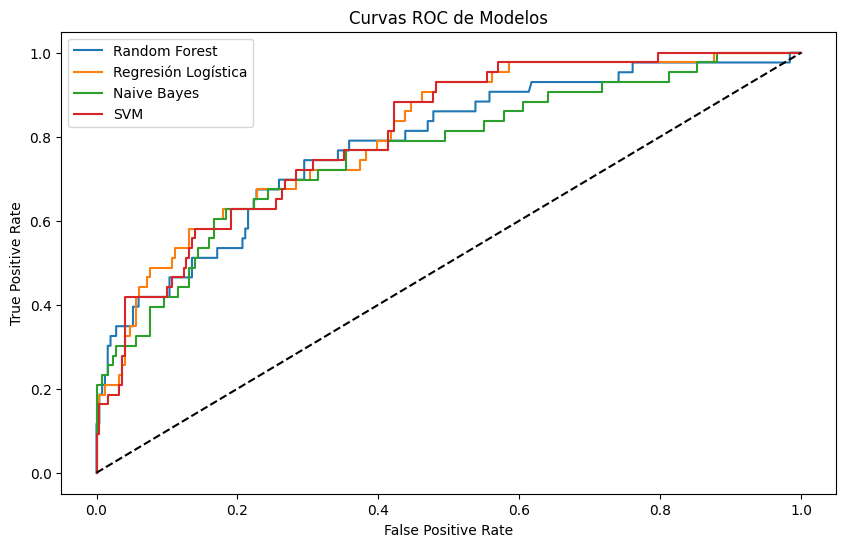

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])[:2], label='Random Forest')
plt.plot(*roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])[:2], label='Regresión Logística')
plt.plot(*roc_curve(y_test, bb_model.predict_proba(X_test)[:, 1])[:2], label='Naive Bayes')
plt.plot(*roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])[:2], label='SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC de Modelos')
plt.legend()
plt.show()


Conclusiones:

El mejor modelo es el SVM según la curva ROC, al mostrar un comportamiento deseado más estable y superior a los otros modelos.